In [1]:
"""
用来批量回测做对比，变量是品种
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.breaker.r_break_strategy_5 import RBreakStrategy
# from research_strategies.turtle.turtle_strategy_3 import TurtleStrategy

*****************************************
开始回测BU99.SHFE:
2020-02-09 13:10:08.875222	开始加载历史数据
2020-02-09 13:10:41.446435	历史数据加载完成，数据量：442530
2020-02-09 13:10:41.555916	策略初始化完成
2020-02-09 13:10:41.555916	开始回放历史数据
2020-02-09 13:10:52.981157	历史数据回放结束
2020-02-09 13:10:52.981157	开始计算逐日盯市盈亏
2020-02-09 13:10:53.004428	逐日盯市盈亏计算完成
*****************************************
开始回测FU99.SHFE:
2020-02-09 13:10:53.004661	开始加载历史数据
2020-02-09 13:11:08.974319	历史数据加载完成，数据量：302415
2020-02-09 13:11:09.043135	策略初始化完成
2020-02-09 13:11:09.043135	开始回放历史数据
2020-02-09 13:11:15.857100	历史数据回放结束
2020-02-09 13:11:15.857100	开始计算逐日盯市盈亏
2020-02-09 13:11:15.869020	逐日盯市盈亏计算完成
*****************************************
开始回测RB99.SHFE:
2020-02-09 13:11:15.869275	开始加载历史数据
2020-02-09 13:11:42.818374	历史数据加载完成，数据量：442530
2020-02-09 13:11:42.938086	策略初始化完成
2020-02-09 13:11:42.938086	开始回放历史数据
2020-02-09 13:11:53.874294	历史数据回放结束
2020-02-09 13:11:53.874294	开始计算逐日盯市盈亏
2020-02-09 13:11:53.891243	逐日盯市盈亏计算完成
*******************************

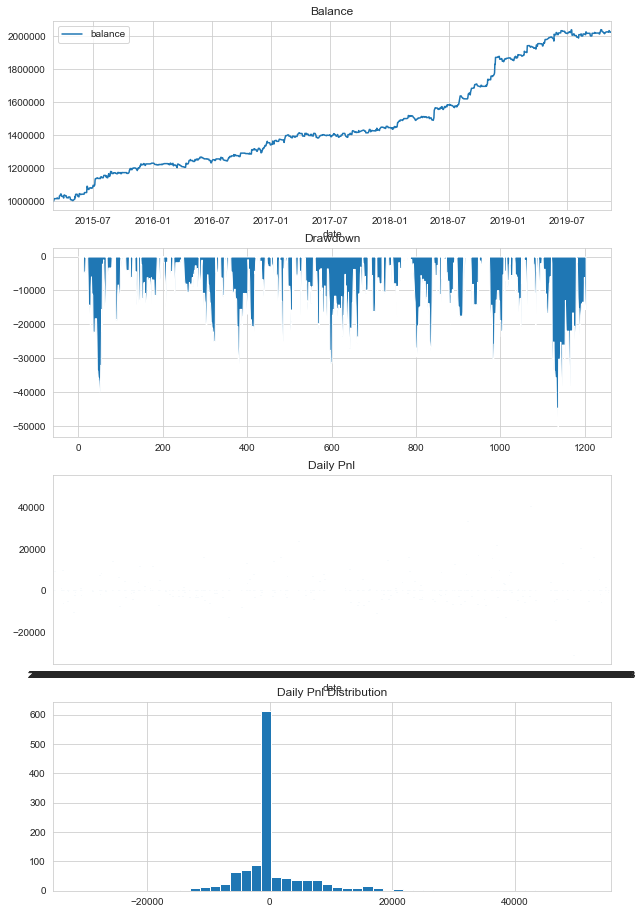

*****************************************
FU99.SHFE 回测数据:
2020-02-09 13:12:59.169101	开始计算策略统计指标
2020-02-09 13:12:59.219242	------------------------------
2020-02-09 13:12:59.233496	首个交易日：	2015-03-09
2020-02-09 13:12:59.233496	最后交易日：	2019-11-14
2020-02-09 13:12:59.233496	总交易日：	1136
2020-02-09 13:12:59.233496	盈利交易日：	114
2020-02-09 13:12:59.239190	亏损交易日：	501
2020-02-09 13:12:59.239190	起始资金：	1,000,000.00
2020-02-09 13:12:59.239190	结束资金：	-2,307,420.71
2020-02-09 13:12:59.239190	总收益率：	-330.74%
2020-02-09 13:12:59.239190	年化收益：	-69.88%
2020-02-09 13:12:59.239190	最大回撤: 	-3,483,422.40
2020-02-09 13:12:59.239190	百分比最大回撤: -351.51%
2020-02-09 13:12:59.239190	最长回撤天数: 	1352
2020-02-09 13:12:59.240187	总盈亏：	-3,307,420.71
2020-02-09 13:12:59.240187	总手续费：	76,845.55
2020-02-09 13:12:59.240187	总滑点：	166,900.00
2020-02-09 13:12:59.240187	总成交金额：	2,561,518,345.79
2020-02-09 13:12:59.240187	总成交笔数：	1669
2020-02-09 13:12:59.240187	日均盈亏：	-2,911.46
2020-02-09 13:12:59.240187	日均手续费：	67.65
2020-02-09 13:12:59.240187	

c:\vnstudio\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:379: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


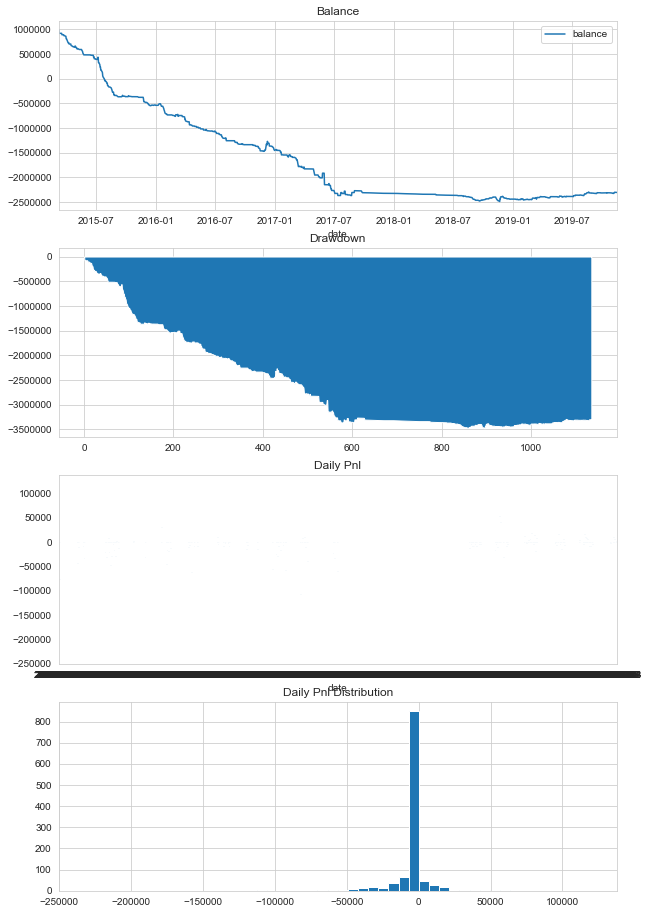

*****************************************
RB99.SHFE 回测数据:
2020-02-09 13:13:19.821558	开始计算策略统计指标
2020-02-09 13:13:19.829537	------------------------------
2020-02-09 13:13:19.829537	首个交易日：	2015-02-27
2020-02-09 13:13:19.829537	最后交易日：	2019-11-14
2020-02-09 13:13:19.829537	总交易日：	1203
2020-02-09 13:13:19.829537	盈利交易日：	317
2020-02-09 13:13:19.829537	亏损交易日：	342
2020-02-09 13:13:19.829537	起始资金：	1,000,000.00
2020-02-09 13:13:19.829537	结束资金：	2,161,448.49
2020-02-09 13:13:19.829537	总收益率：	116.14%
2020-02-09 13:13:19.829537	年化收益：	23.17%
2020-02-09 13:13:19.829537	最大回撤: 	-99,077.51
2020-02-09 13:13:19.829537	百分比最大回撤: -5.08%
2020-02-09 13:13:19.829537	最长回撤天数: 	101
2020-02-09 13:13:19.829537	总盈亏：	1,161,448.49
2020-02-09 13:13:19.829537	总手续费：	118,625.36
2020-02-09 13:13:19.829537	总滑点：	260,500.00
2020-02-09 13:13:19.829537	总成交金额：	3,954,178,800.16
2020-02-09 13:13:19.829537	总成交笔数：	2605
2020-02-09 13:13:19.829537	日均盈亏：	965.46
2020-02-09 13:13:19.829537	日均手续费：	98.61
2020-02-09 13:13:19.829537	日均滑点：	216.54

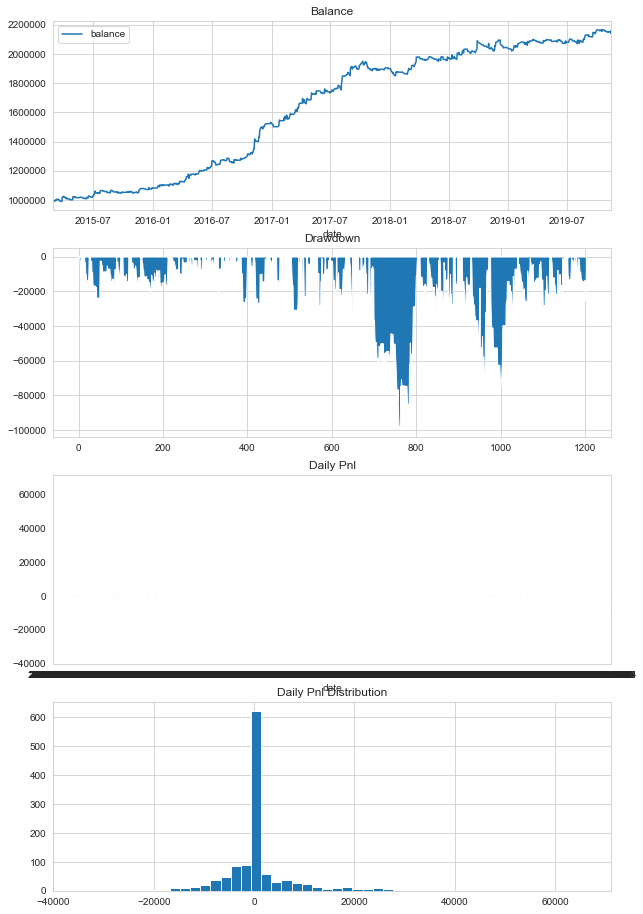

*****************************************
SR99.CZCE 回测数据:
2020-02-09 13:13:41.969959	开始计算策略统计指标
2020-02-09 13:13:41.977968	------------------------------
2020-02-09 13:13:41.977968	首个交易日：	2015-03-09
2020-02-09 13:13:41.977968	最后交易日：	2019-11-14
2020-02-09 13:13:41.978935	总交易日：	1146
2020-02-09 13:13:41.978935	盈利交易日：	312
2020-02-09 13:13:41.978935	亏损交易日：	349
2020-02-09 13:13:41.978935	起始资金：	1,000,000.00
2020-02-09 13:13:41.978935	结束资金：	2,275,011.57
2020-02-09 13:13:41.978935	总收益率：	127.50%
2020-02-09 13:13:41.978935	年化收益：	26.70%
2020-02-09 13:13:41.978935	最大回撤: 	-115,662.42
2020-02-09 13:13:41.978935	百分比最大回撤: -9.55%
2020-02-09 13:13:41.978935	最长回撤天数: 	68
2020-02-09 13:13:41.978935	总盈亏：	1,275,011.57
2020-02-09 13:13:41.978935	总手续费：	126,467.92
2020-02-09 13:13:41.978935	总滑点：	148,200.00
2020-02-09 13:13:41.978935	总成交金额：	4,215,597,385.75
2020-02-09 13:13:41.978935	总成交笔数：	1482
2020-02-09 13:13:41.978935	日均盈亏：	1,112.58
2020-02-09 13:13:41.978935	日均手续费：	110.36
2020-02-09 13:13:41.978935	日均滑点：	129

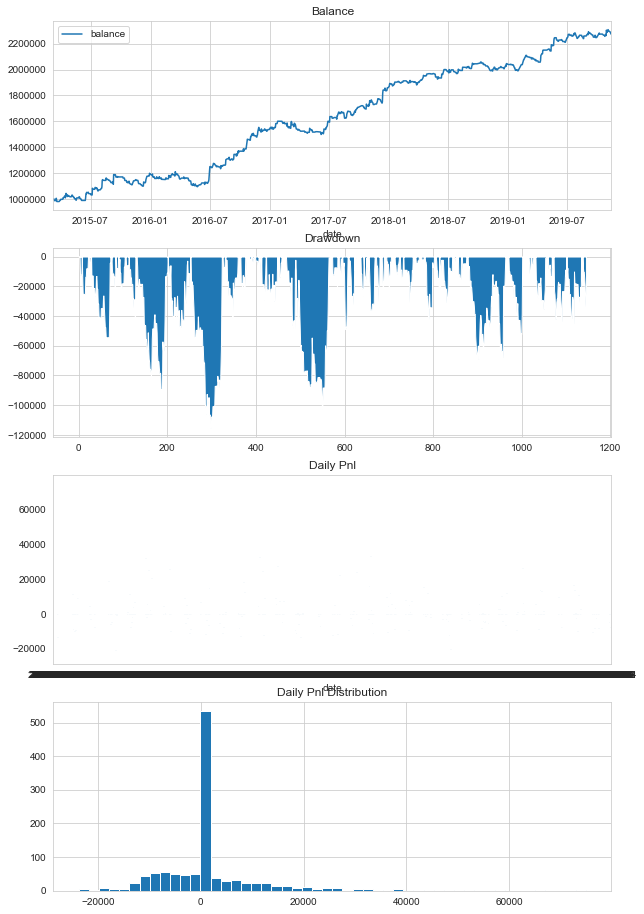

In [2]:
varieties = [
    "BU99.SHFE",
    "FU99.SHFE",
    "RB99.SHFE",
    "SR99.CZCE"
]

engine_dict = {}
for item in varieties:
    print('*****************************************')
    print(f'开始回测{item}:')

    engine = BacktestingEngine()
    engine.set_parameters(
        vt_symbol=item,
        interval="1m",
        start=datetime(2015, 1, 1),
        end=datetime(2019, 11, 15),
        rate=0.3/10000, # 保证金比例
        slippage=0.2,  # 滑点
        size=10,  # 合约乘数
        pricetick=0.2, # 最小价格变动
        capital=1_000_000,
    )
    engine.add_strategy(RBreakStrategy, {
        'fixed_size': 50
    })

    engine.load_data()
    engine.run_backtesting()
    engine.calculate_result()
    engine_dict[item] = engine

for key_engine, item_engine in engine_dict.items():
    print('*****************************************')
    print(f'{key_engine} 回测数据:')
    item_engine.calculate_statistics()
    item_engine.show_chart()